# Проверка гипотез по увеличению выручки в интернет-магазине. Анализ A/B-теста.

Отдел маркетинга подготовил список гипотез для увеличения выручки.

***Задача:*** Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

***Описание данных:***

Файл ***/datasets/hypothesis.csv*** хранит 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort:

* `Hypothesis` — краткое описание гипотезы,
* `Reach` —  охват пользователей по 10-балльной шкале,
* `Impact` — влияние на пользователей по 10-балльной шкале,
* `Confidence` — уверенность в гипотезе по 10-балльной шкале,
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


Файл ***/datasets/orders.csv*** хранит информацию о результатах проведенного A/B-теста:

* `transactionId` —  идентификатор заказа,
* `visitorId` — идентификатор пользователя, совершившего заказ,
* `date`   — дата, когда был совершён заказ,  
* `revenue` — выручка заказа,
* `group` — группа A/B-теста, в которую попал заказ.

Файл ***/datasets/visitors.csv*** хранит информацию о результатах проведенного A/B-теста:

* `date` — дата,
* `group` —  группа A/B-теста,
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

### Загрузим данные и подготовим их к анализу

Изучим данные и выполним предобработку. Есть ли в данных пропуски и дубликаты? Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратим внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns


In [2]:
try:
    hypothesis, orders, visitors = (
    pd.read_csv('hypothesis.csv'), 
    pd.read_csv('orders.csv'), 
    pd.read_csv('visitors.csv')
    )  
except:
    hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'), 
    pd.read_csv('/datasets/orders.csv'), 
    pd.read_csv('/datasets/visitors.csv')
    )  

In [3]:
def data_exploration(df):
    display(df.head(10))
    print(df.info())
    print('Количество дубликатов:',df.duplicated().sum());
data_exploration(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
Количество дубликатов: 0


In [4]:
data_exploration(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
Количество дубликатов: 0


In [5]:
data_exploration(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
Количество дубликатов: 0


Предобработка данных показала: дубликатов и пропусков нет, необходимо переименовать названия столбцов в `hypothesis` и в `orders` и преобразовать данные о времени, где это необходимо. Так же проверим категориальные данные. И проверим, есть ли в таблице orders пользователи, оказавшиеся одновременно в двух группах.

In [6]:
hypothesis.columns = hypothesis.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

In [7]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [8]:
print(hypothesis['hypothesis'].value_counts())

Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей              1
Запустить собственную службу доставки, что сократит срок доставки заказов                                       1
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    1
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар             1
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                                1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию            1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Запустить акцию, дающую скидку на товар в день рождения                                 

In [9]:
print(orders['group'].value_counts())

B    640
A    557
Name: group, dtype: int64


In [10]:
print(visitors['group'].value_counts())

A    31
B    31
Name: group, dtype: int64


In [11]:
len(np.intersect1d(orders.query('group == "A"')['visitorid'].unique(), orders.query('group == "B"')['visitorid'].unique()))

58

В данных есть 58 значений, встречающихся в обеих группах. Это порядка 5% от общего количества. Удалим их, чтобы не было дополнительных искажений при проведении тестирования.

In [12]:
repeats = (np.intersect1d(orders.query('group == "A"')['visitorid'].unique(), 
                         orders.query('group == "B"')['visitorid'].unique())).tolist()

orders = orders[~orders['visitorid'].isin(repeats)]

In [13]:
len(np.intersect1d(orders.query('group == "A"')['visitorid'].unique(), orders.query('group == "B"')['visitorid'].unique()))

0

**Вывод:** Дубликатов и пропусков нет, переименовали названия столбцов и преобразовали данные о времени, где это было необходимо. Категориальные данные проверены, неявных дубликатов тоже нет. В данных есть 58 значений, встречающихся в обеих группах. Это порядка 5% от общего количества. Удалим их, чтобы не было дополнительных искажений при проведении тестирования.

### Приоритизация гипотез.

#### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [14]:
pd.options.display.max_colwidth = 1
hypothesis['ice'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
display(hypothesis[['hypothesis','ice']].sort_values(by='ice',ascending=False).round(3))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


#### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [15]:
hypothesis['rice'] = hypothesis['reach']* hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
display(hypothesis[['hypothesis','rice']].sort_values(by='rice',ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:** приоритизация гипотез при применении RICE вместо ICE изменилась. На первое место вышла гипотеза с индексом 7(была на 3 месте), на второе место гипотеза 2 поднялась  с 5 места. А лидер в ICE гипотеза с индексом 8 опустилась на 5 место. Это связано с тем, что при применении  фреймворка RICE учитывается параметр Reach (охват пользователей). В гипотезе 7 он максимальный(10), а в уступившей лидерство гипотезе 8 параметр Reach минимальный(1). Это и повлияло на изменение приоритизации гипотез.

### Анализ A/B-теста.

#### Построим график кумулятивной выручки по группам.

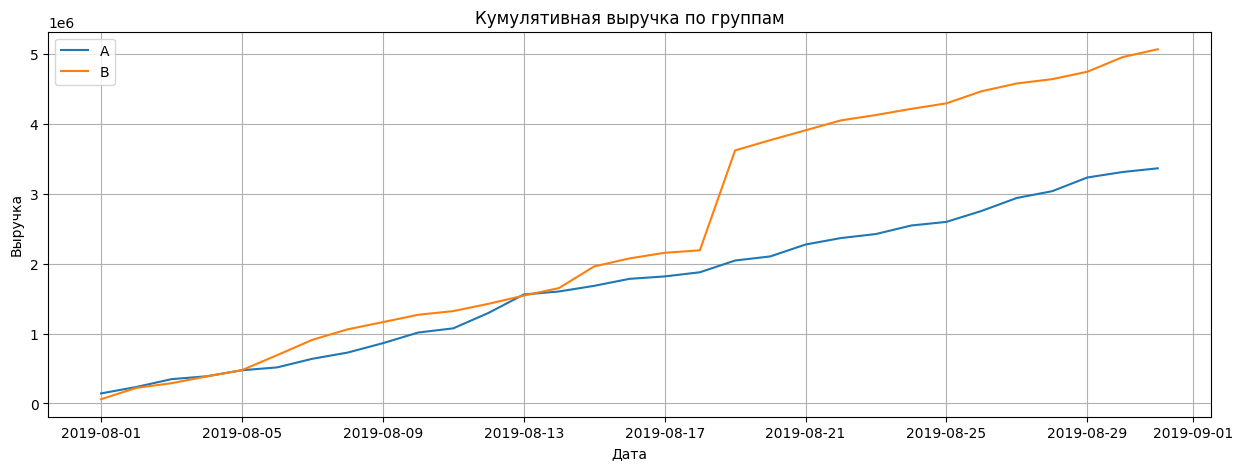

In [16]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders','visitors']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders','visitors']]
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.grid()
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend(); 



**Выводы и предположения:** Выручка почти равномерно увеличивается в течение всего теста. Группа B стабильно лучше группы A, и различие увеличивается со временем.
График выручки группы B имеет резкий всплеск в районе 18-19 августа. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. При дальнейшем анализе это нужно учитывать.

#### Построим график кумулятивного среднего чека по группам.
Для этого разделим кумулятивную выручку на кумулятивное число заказов.

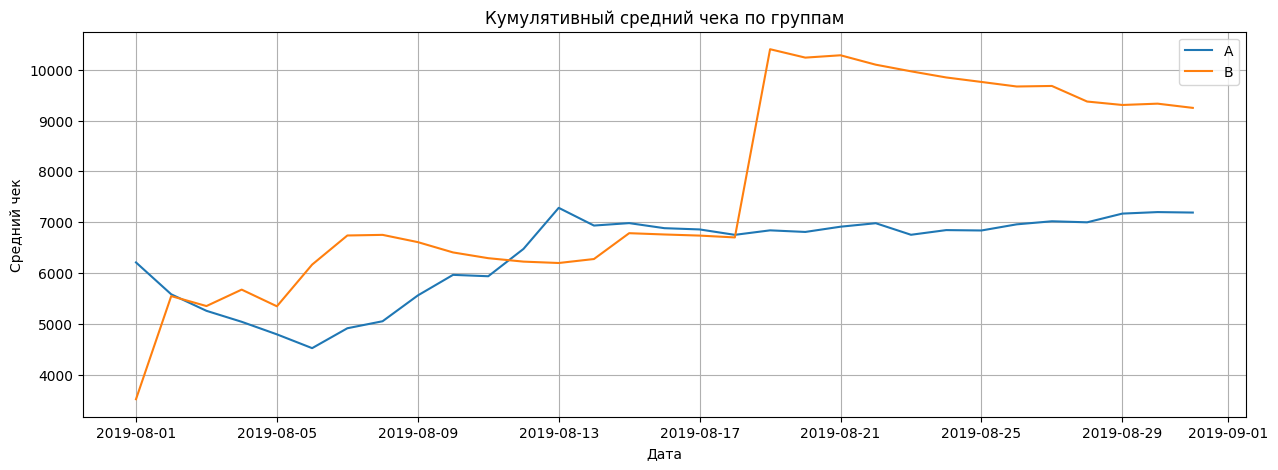

In [17]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.grid()
plt.title('Кумулятивный средний чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend(); 

**Выводы и предположения:** Средний чек в группе A стабильно больше, чем в группе B, почти всегда, кроме 13 августа. Скорее всего, в группе B была какая-то крупная покупка. Так же как в предыдущем графике, заметно резкое повышение в группе B в районе 18-19 августа. А после этого всплеска, в группе B средний чек постепенно падает, а вгруппе A, наоборот растет.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.
Соберём данные в одном датафрейме,поcтроим отношение средних чеков,добавим ось X.

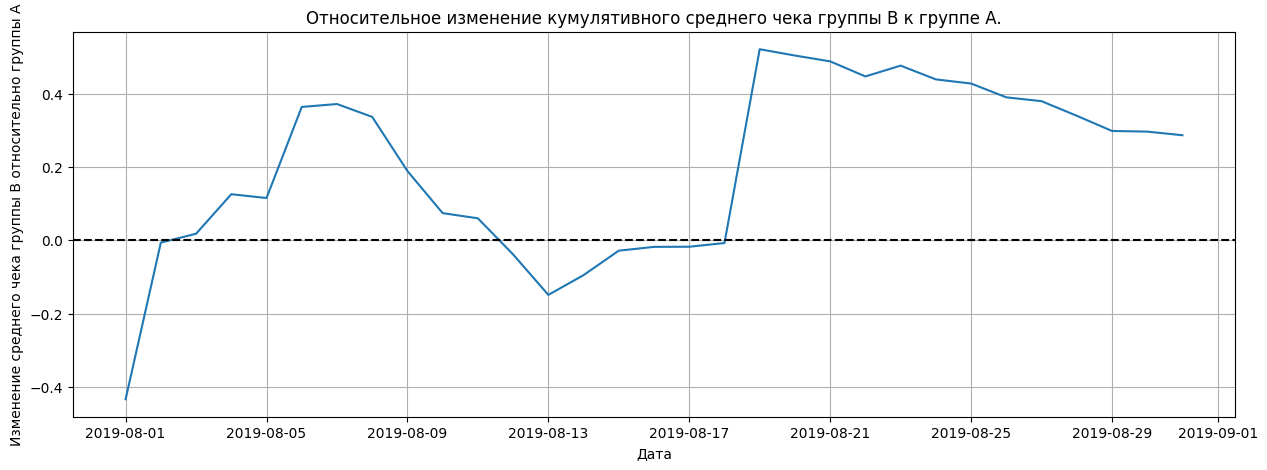

In [18]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.grid()
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A.')
plt.xlabel('Дата')
plt.ylabel('Изменение среднего чека группы B относительно группы A'); 

**Выводы и предположения:**  Средний чек группы B превышает средний чек группы A почти всё время, кроме 12-14 августа. Опять же здесь хорошо видно, что 19 августа был сильный всплеск (рост) за счет заказа с аномально большим объемом, а в последующие дни средний чек группы B также постепенно снижается.

#### Построим график кумулятивного среднего количества заказов по группам.
Для этого разделим кумулятивное число заказов на кумулятивное количество посетителей.

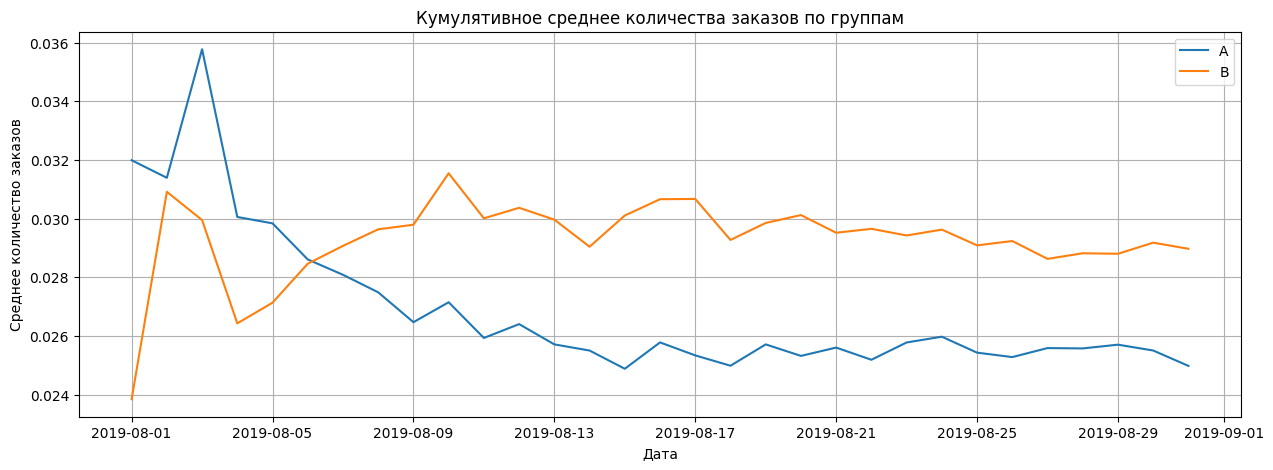

In [19]:

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')

plt.grid()
plt.title('Кумулятивное среднее количества заказов по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.legend(); 

**Выводы и предположения:** До 6-7 августа среднее количество заказов в группе А было больше, чем в группе В, но после 6-7 августа всё кардинально изменилось и группа В стала стабильно лучше группы A . Ранее замеченные всплески в группе A в районе 12-14 августа и в группе B в районе 19 августа здесь не наблюдаются. Скорее всего, эти всплески из-за единичных покупок на крупную сумму, а не из-за повышенного количества заказов.

#### Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A.

Соберём данные в одном датафрейме,поcтроим отношение среднего количества заказов,добавим ось X.

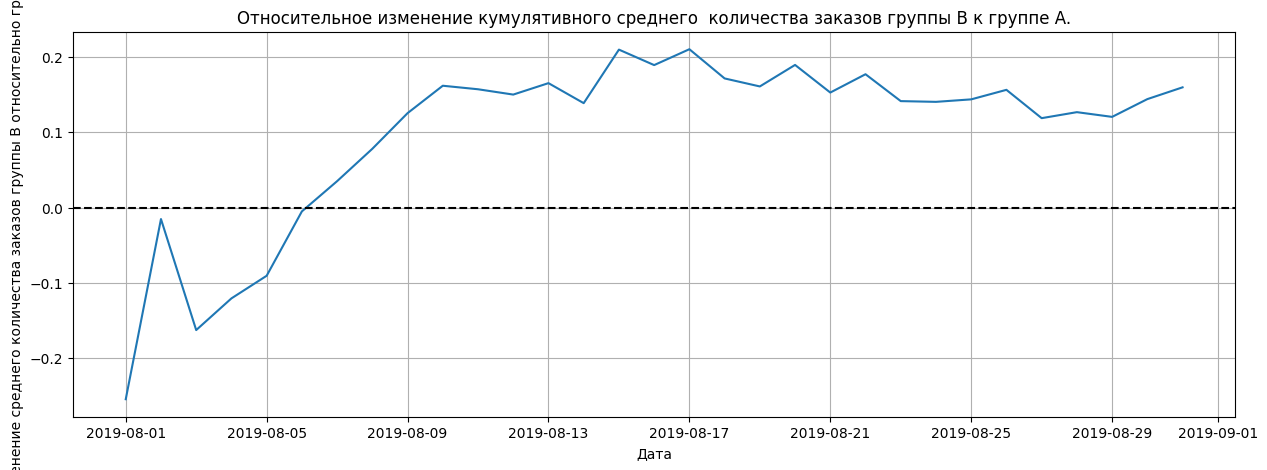

In [20]:
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.grid()
plt.title('Относительное изменение кумулятивного среднего  количества заказов группы B к группе A.')
plt.xlabel('Дата')
plt.ylabel('Изменение среднего количества заказов группы B относительно группы A');  

**Выводы и предположения:** Этот график полностью подтверждает предыдущий. До 6-7 августа среднее количество заказов в группе  А было больше, чем в группе В, но после 6-7 августа группа B стала значительно лучше группы A по среднему количеству заказов, различие стало уменьшается после 17 августа, но очень незначительно. А после 29 стало расти.

#### Построим точечный график количества заказов по пользователям.

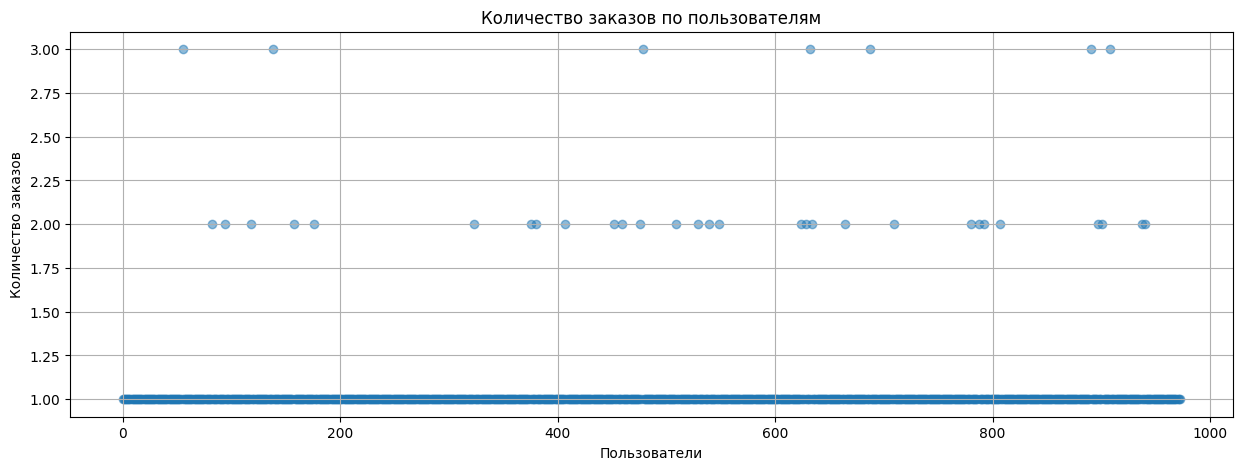

In [21]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorid', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5) ;

**Выводы и предположения:** Больше всего пользователей, которые совершили 1 заказ. Чуть меньше, тех кто совершили 2 и 3 заказа.  Совсем мало - с 8 заказами и больше. Скорее всего это и является выбросами, но чтобы сказать точно, лучше посчитать 95-й и 99-й перцентили. 

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [22]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Не более 1% пользователей оформляли больше чем 2 заказа. Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

#### Построим точечный график стоимостей заказов.

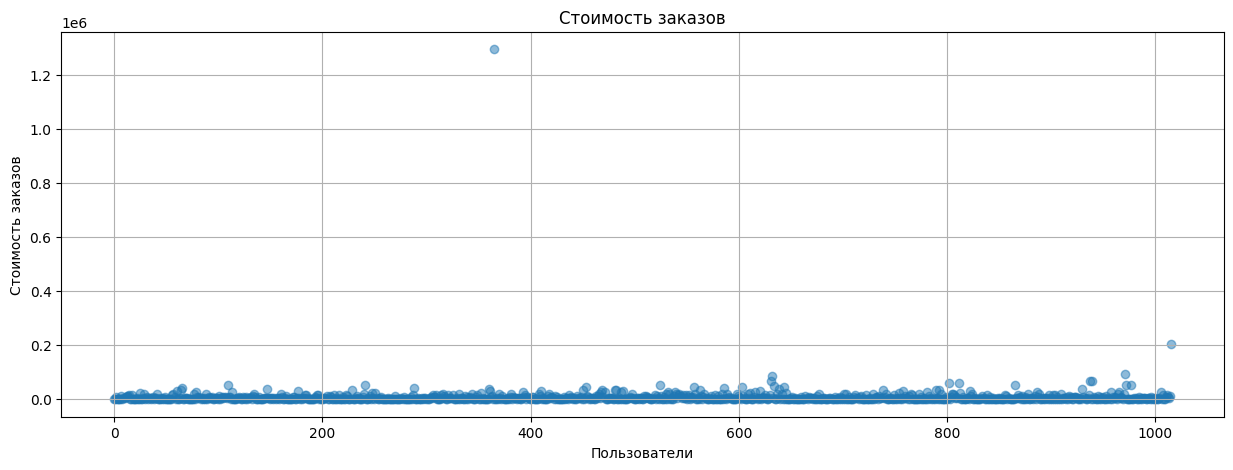

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Стоимость заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.5);

Рассмотрим его поближе.

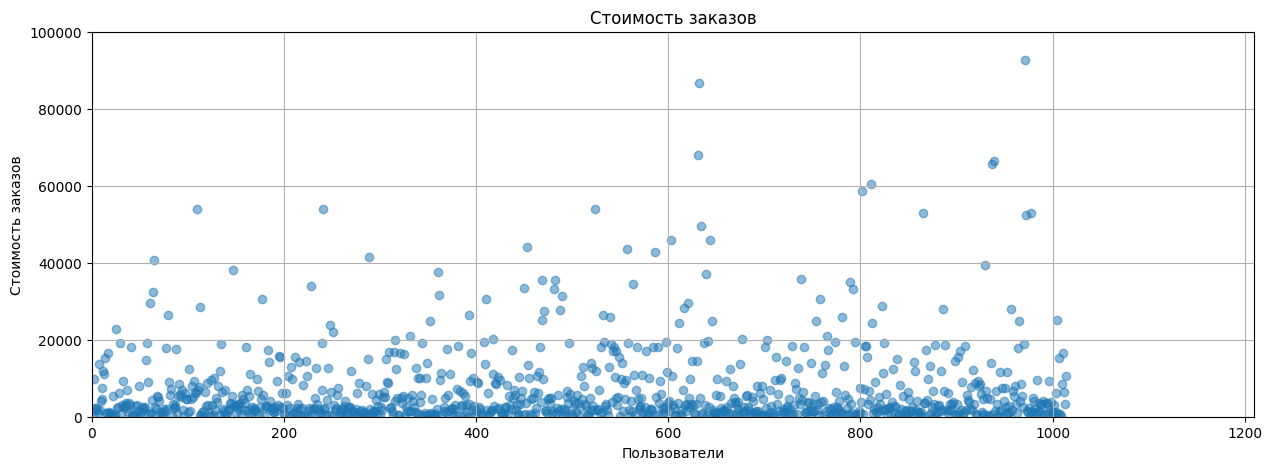

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Стоимость заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.axis([0, 1210, 0, 100000]);

**Выводы и предположения:** Как показывает график, большинство заказов по стоимости не больше 100 тысяч. Чтобы найти более точную границу аномальных заказов рассчитаем 95-й и 99-й перцентили.

#### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [25]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


99% заказов меньше суммы 53904 , установим её в качестве границы для аномалий.

#### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным.

Сформулируем гипотезы.

Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

Для начала подготовим данные.Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием. Применим критерий Манна-Уитни.

In [26]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print("alpha =",0.05)
print("p-value = {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный прирост среднего числа заказов группы B {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


alpha = 0.05
p-value = 0.01102
Относительный прирост среднего числа заказов группы B 0.160


**Выводы и предположения:** p-value = 0.011 меньше 0.05. На основе имеющихся данных на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов между группами по «сырым» данным нет в пользу альтернативной. С большой вероятностью среднее количество заказов между группами по «сырым» данным разные.
А относительный прирост группы B равен 16%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Нулевая гипотеза: различий в среднем чеке между группами нет.

Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [27]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                                    orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print("Относительные различия в среднем чеке между группами B и A = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/
                                                            orders[orders['group']=='A']['revenue'].mean()-1)) 


alpha = 0.05
p-value = 0.829
Относительные различия в среднем чеке между группами B и A = 0.287


**Выводы и предположения:** P-value значительно больше 0.05. Значит,оснований отвергнуть нулевую гипотезу в пользу альтернативной и считать, что в среднем чеке есть различия,нет. Хотя средний чек группы B значительно выше среднего чека группы A.

#### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным.

Ранее мы приняли за аномальных пользователей тех, кто совершил 3 и больше заказов или совершил заказ дороже 53904 рублей. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 53904 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. Узнаем, сколько всего аномальных пользователей методом shape().

In [28]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 


1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
16


Всего аномальных пользователей 16.
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста. Применим статистический критерий Манна-Уитни к полученным выборкам:

In [29]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print("alpha =",0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов группы B {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.007
Относительный прирост среднего числа заказов группы B 0.189


**Выводы и предположения:** Результаты по среднему количеству заказов практически не изменились. p-value = 0.007 значительно меньше 0.05. На основе имеющихся данных на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов между группами нет в пользу альтернативной. С большой вероятностью среднее количество заказов между группами по «очищенным» данным разные. Относительный прирост среднего числа заказов группы B равен почти 19%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [30]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительные различия в среднем чеке между группами B и A = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.788
Относительные различия в среднем чеке между группами B и A = -0.032


**Выводы и предположения:** P-value уменьшился,но очень незначительно, а вот разница между сегментами сократилась с почти 29% до практически 0%.
Хотя общие выводы по результатам теста не изменились. Оснований отвергать нулевую гипотезу в пользу альтернативной и считать, что в среднем чеке есть различия, по прежнему нет. И то, что различия в среднем чеке между группами B и A по «очищенным» данным практически = 0, это подтверждают.

### Выводы:

Приоритизация гипотез при применении RICE вместо ICE изменилась. На первое место вышла гипотеза с индексом 7(была на 3 месте), на второе место гипотеза 2 поднялась с 5 места. А лидер в ICE гипотеза с индексом 8 опустилась на 5 место. Это связано с тем, что при применении фреймворка RICE учитывается параметр Reach (охват пользователей). В гипотезе 7 он максимальный(10), а в уступившей лидерство гипотезе 8 параметр Reach минимальный(1). Это и повлияло на изменение приоритизации гипотез.

По результатам теста принимаем решение: Остановить тест, зафиксировать победу группы B.

Имеющиеся факты:

Есть статистически значимые различия по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий;

Относительный прирост среднего числа заказов группы B по «сырым» данным равен 16%, а по по «очищенным» данным 18.9%;

Несмотря на то, что нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий, средний чек группы B оказался незначительно (на 3%) ниже среднего чека группы A по "очищенным" данным, в то время как по "сырым" данным, он был больше на 28.7%. Всё логично, аномальные заказы убрали и чеки сравнялись.

Графики, показывающие изменение кумулятивного средний чека по группам и изменение кумулятивного среднего количества заказов говорит о том, что результаты группы B значительно лучше (эффективнее) результатов группы A.
